## Importação das bibliotecas utilizadas para análise dos dados

In [716]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura da base de dados

In [585]:
file=pd.read_csv("car data.csv")
file

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Dados duplicados removidos da base, verifica-se também que não há linhas vazias (null).

In [586]:
file=file.drop_duplicates()
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


## Relação entre Tipo de vendedor x Preço de venda

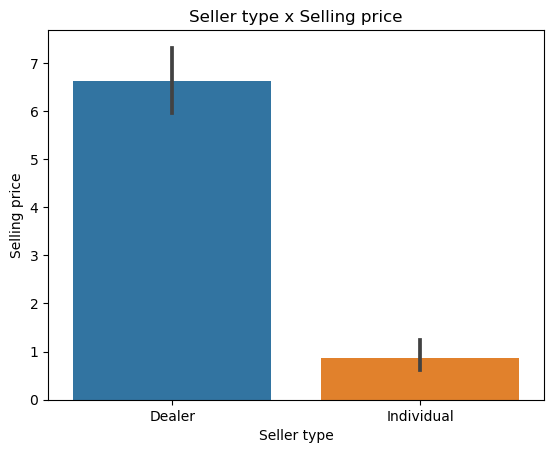

In [587]:
fig1=sns.barplot(x=file['Seller_Type'], y=file['Selling_Price'])
fig1.set(title='Seller type x Selling price')
fig1.set(xlabel='Seller type')
fig1.set(ylabel='Selling price');

## Tipo de transmissão X Preço de venda

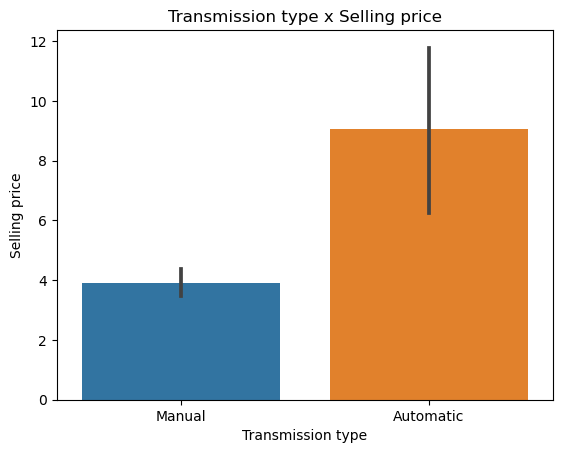

In [588]:
fig2=sns.barplot(x=file['Transmission'], y=file['Selling_Price'])
fig2.set(title='Transmission type x Selling price')
fig2.set(xlabel='Transmission type')
fig2.set(ylabel='Selling price');

## Combustível utilizado x Preço de venda

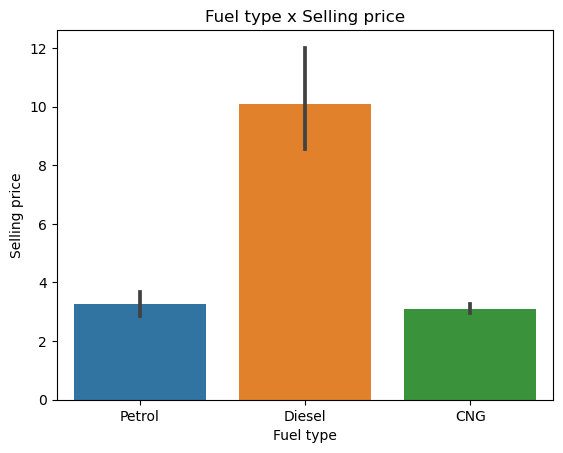

In [589]:
fig3=sns.barplot(x=file['Fuel_Type'], y=file['Selling_Price'])
fig3.set(title='Fuel type x Selling price')
fig3.set(xlabel='Fuel type')
fig3.set(ylabel='Selling price');


# Identificação de outliers

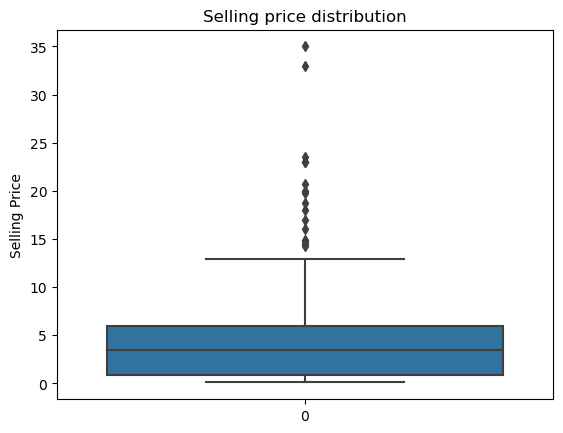

In [590]:
fig4=sns.boxplot(file['Selling_Price'])
fig4.set(title="Selling price distribution");
fig4.set(ylabel="Selling Price");

## Remoção de outliers

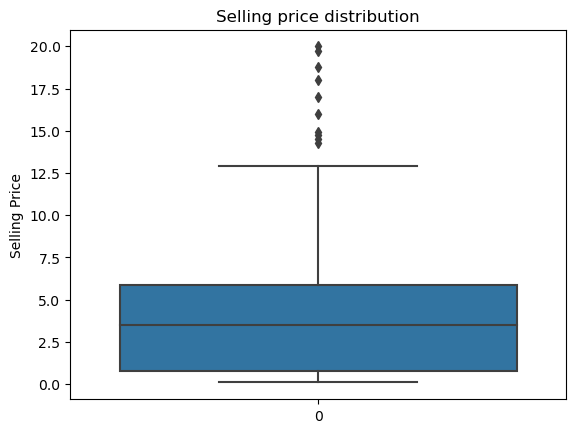

In [706]:
file=file[file['Selling_Price']<20]
fig5=sns.boxplot(file['Selling_Price'])
fig5.set(title="Selling price distribution");
fig5.set(ylabel="Selling Price");

In [592]:
file

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Desenvolvimento do modelo de máquina

## Conversão dos rótulos/categorias textuais em valores numéricos.

In [593]:
encoded_file=pd.get_dummies(file,columns=['Seller_Type','Transmission','Fuel_Type'])
encoded_file

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,0,1,0,0,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,1,0,0,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,0,1,0,1,0
297,brio,2015,4.00,5.90,60000,0,1,0,0,1,0,0,1
298,city,2009,3.35,11.00,87934,0,1,0,0,1,0,0,1
299,city,2017,11.50,12.50,9000,0,1,0,0,1,0,1,0


## Importação das bibliotecas sklearn  para desenvolver a máquina

In [594]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

## Divisão da base para teste e para treinar

In [627]:
from sklearn.model_selection import train_test_split
X=encoded_file.drop(columns=['Car_Name','Year','Selling_Price'])
Y=encoded_file['Selling_Price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## Previsão e análise do score(desempenho)

In [711]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

LR.fit(X_train,Y_train)
predict_LR=LR.predict(X_test)
score_LR=metrics.r2_score(Y_test,predict_LR)
mse = mean_squared_error(Y_test, predict_LR)

print(f"A máquina possui um score de: {round(score_LR*100,2)}%")
print(f"Erro quadrático médio: {round(mse,2)}")

A máquina possui um score de: 84.8%
Erro quadrático médio: 2.16


## Análise das previsões

In [700]:
table_predictions=pd.DataFrame(file[['Car_Name','Selling_Price']])
table_predictions['Predicted_Price']=LR.predict(X)
table_predictions['Predicted_Price']=table_predictions['Predicted_Price'].round(2)
table_predictions['Error%']=100*(abs((table_predictions['Selling_Price']-table_predictions['Predicted_Price'])/table_predictions['Selling_Price']))
table_predictions['Error%']=table_predictions['Error%'].round(2)
table_predictions=table_predictions.reset_index(drop=True)

## Comparação dos preços de venda x preços de venda previstos

In [715]:
table_predictions[0:20].sort_values('Error%')

,Car_Name,Selling_Price,Predicted_Price,Error%
15,ertiga,7.75,7.79,0.52
9,ciaz,7.45,6.94,6.85
7,s cross,6.50,6.95,6.92
16,ertiga,7.25,7.81,7.72
11,ciaz,6.85,7.47,9.05
19,alto k10,2.85,3.14,10.18
5,vitara brezza,9.25,8.02,13.30
12,ciaz,7.50,6.47,13.73
0,ritz,3.35,3.86,15.22
2,ciaz,7.25,6.14,15.31
